In [1]:
import numpy as np
from matplotlib import pyplot as plt

import sys

sys.path.append("../q_vendi_score")

from q_vendi import score, sequential_maximize_score

# Problem setup

We work with points in a 2d square $x \in [-1, 1]^2$, where the score function is a Gaussian centered at the origin (that is, points closer to the origin yield higher quality).

In [2]:
def centered_gaussian(x):
    return np.exp(np.sum(-x**2, axis=-1))


def rbf_k(x1, x2):
    return np.exp(np.sum(-(x1 - x2)**2) / 2)

In [3]:
n = 101
xs = np.linspace(-1, 1, n)
X = np.stack([c.flatten() for c in np.meshgrid(xs, xs, indexing="ij")]).T
all_scores = centered_gaussian(X)

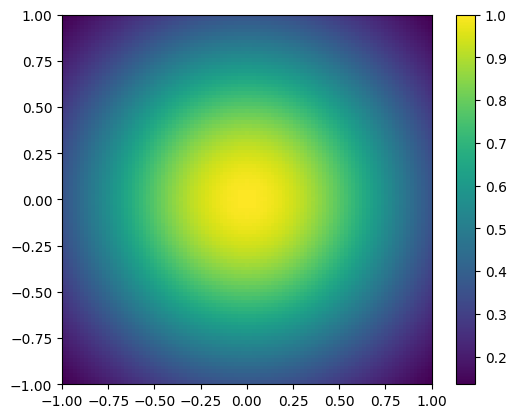

In [4]:
plt.imshow(
    all_scores.reshape(n, n).T,
    origin="lower",
    extent=[-1, 1, -1, 1],
)
plt.colorbar()
plt.show()

# Quality-weighted Vendi Scores of randomly selected data

We are interested in the quality-weighted Vendi Score (qVS) of collections of size `5`.
Below we randomly select `3` collections and compute their qVS.

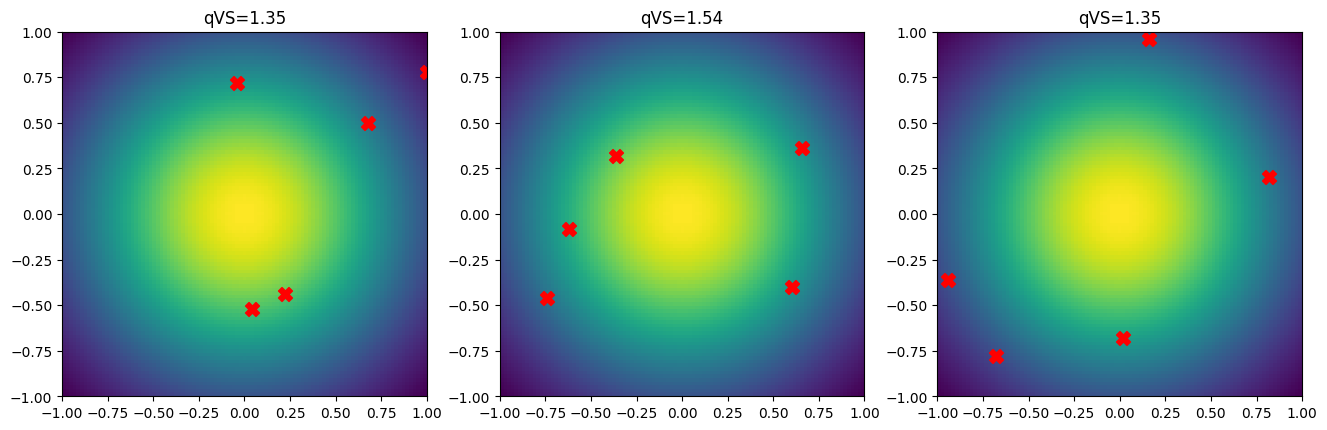

In [6]:
sample_size = 5
examples_to_show = 3

fig, ax = plt.subplots(1, 3, figsize=(16, 5))

for example in range(examples_to_show):
    selected_ind = np.random.choice(np.arange(X.shape[0]), size=sample_size, replace=False)
    selected_xs = X[selected_ind]

    qVS = score(selected_xs, rbf_k, centered_gaussian)

    ax[example].imshow(
        all_scores.reshape(n, n).T,
        origin="lower",
        extent=[-1, 1, -1, 1],
    )
    ax[example].scatter(
        selected_xs[:, 0],
        selected_xs[:, 1],
        marker="X",
        c="r",
        s=100,
    )
    ax[example].set_title(f"{qVS=:.2f}")

plt.show()

# Finding the data set with the highest quality-weighted Vendi Scores

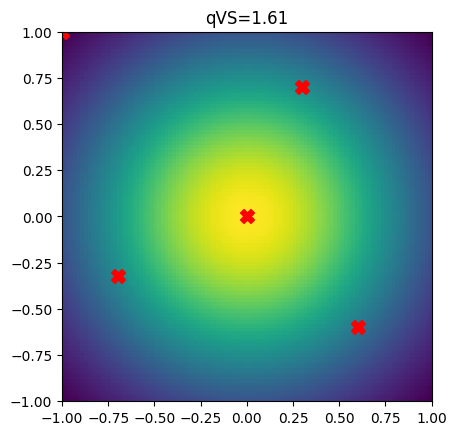

In [7]:
selected_xs, qVS = sequential_maximize_score(X, rbf_k, centered_gaussian, sample_size)
selected_xs = np.stack(selected_xs)

plt.imshow(
    all_scores.reshape(n, n).T,
    origin="lower",
    extent=[-1, 1, -1, 1],
)
plt.scatter(
    selected_xs[:, 0],
    selected_xs[:, 1],
    marker="X",
    c="r",
    s=100,
)
plt.title(f"{qVS=:.2f}")
plt.show()

# Varying the order `q`

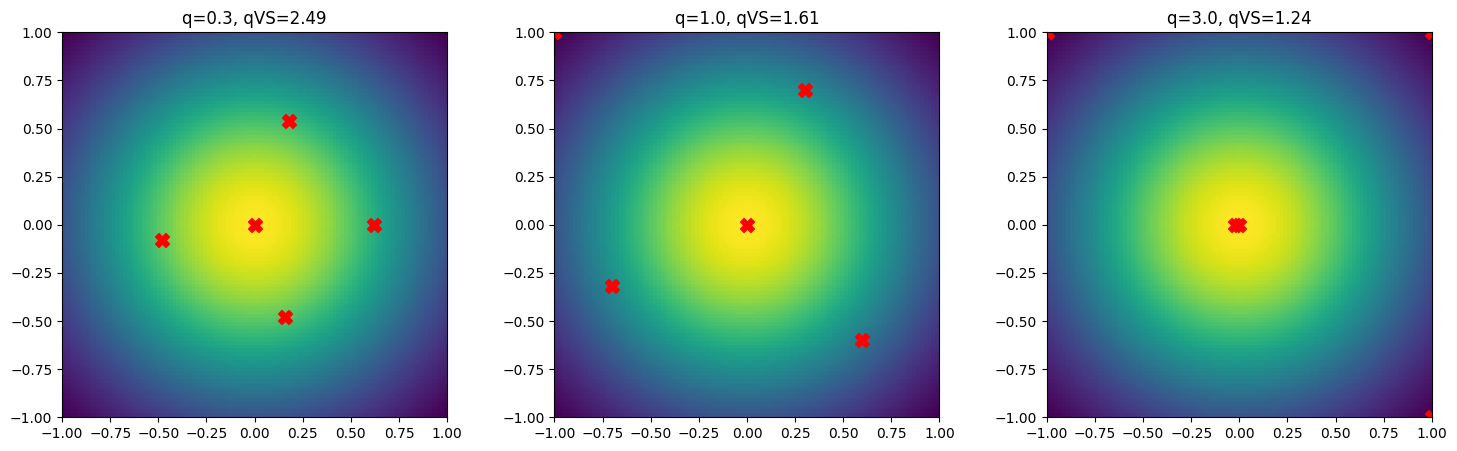

In [8]:
qs = [0.3, 1, 3]

fig, ax = plt.subplots(1, len(qs), figsize=(6 * len(qs), 5))

for q_i, q in enumerate(qs):
    selected_xs, qVS = sequential_maximize_score(
        X, rbf_k, centered_gaussian, sample_size, q=q
    )
    selected_xs = np.stack(selected_xs)

    ax[q_i].imshow(
        all_scores.reshape(n, n).T,
        origin="lower",
        extent=[-1, 1, -1, 1],
    )
    ax[q_i].scatter(
        selected_xs[:, 0],
        selected_xs[:, 1],
        marker="X",
        c="r",
        s=100,
    )
    ax[q_i].set_title(f"{q=:.1f}, {qVS=:.2f}")

plt.show()